<h1 align=center> Convolution Neural Networks (CNNs) In Depth </h1>

- Convolutional Neural Networks (CNNs), also called ConvNets, are a type of artificial neural network that excel at processing data with a grid-like structure, most commonly images
- Convolutional Neural Networks have revolutionized the field of computer vision and beyond, providing state-of-the-art solutions to many complex problems
- They are designed to automatically and adaptively learn spatial hierarchies of features through backpropagation by using multiple building blocks, such as convolution layers, pooling layers, and fully connected layers

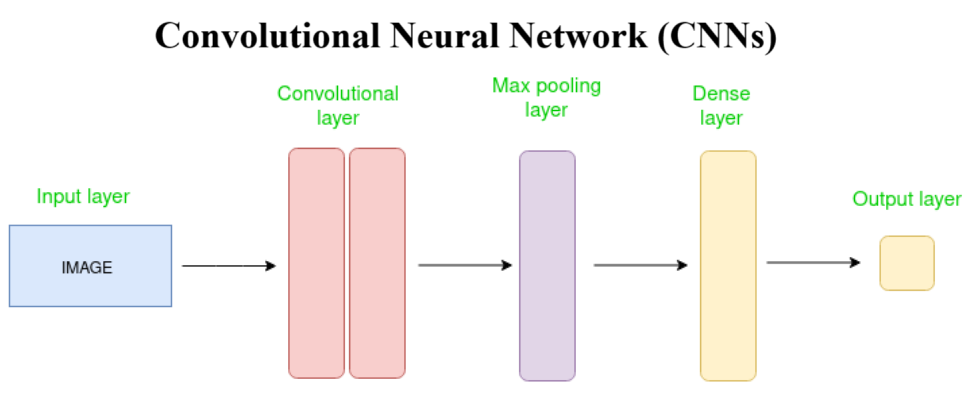

### **Key Components of CNNs**

1. **Convolutional Layer**: This is the core building block of a CNN. It consists of a set of filters (or kernels) that are applied to the input image to produce feature maps. Each filter detects different features such as edges, textures, or patterns.
    - **Filters/Kernels**: Are used to extract the essential features from the input data
    - **Stride**: The step size by which the filter moves across the input
    - **Padding**: It refers to the amount of pixel added, typically zeros, around the borders of the input feature map. Most common types of padding:
        - Valid: no zeros are added
        - Same: adds enough zeros to maintain the same height and width of the input feature map after convolution
        - Below is the formula to find the size of height or weight of a layer for having valid or same padding:
    
    $$
    valid = [\frac{n-f}{s}+1] \times [\frac{n-f}{s}+1] \times n_c\\ same = [\frac{n+2p-f}{s}+1] \times [\frac{n+2p-f}{s}+1]\times n_c \\ \text{To find out the size of (h/w), we use the below formula}:\\ n_{h/w}^{[l]} = [\frac{n_{h/w}^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1] \times [\frac{n_{h/w}^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1]\times n_c\\ where:\\n_{h/w}^{[l]}: \text{hight/width size of layer l}\\n_{h/w}^{[l-1]}: \text{hight/width size of one layer before layer l}\\f^{[l]}:\text{ fillter size layer l}\\p^{[l]}:\text{ padding layer l}\\ \\s^{[l]}:\text{ stride layer l}\\ n_c: \text{number of channels}
    $$
    

`Note:`If the input feature map has 3 channels (e.g., an RGB image), and the convolutional layer uses 32 filters, then the output feature map will have 32 channels.

- Below is shown how CNN perform conv operation with having stride and padding equal to one

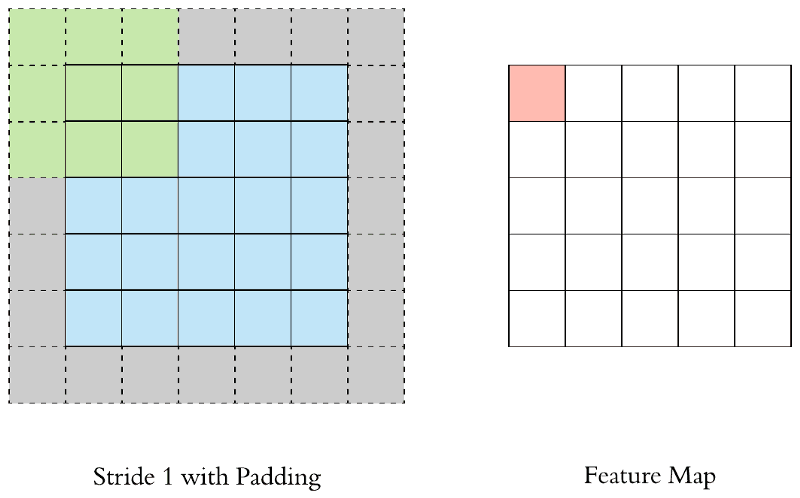

2. **Activation Function**: Typically, a nonlinear activation function like ReLU (Rectified Linear Unit) is applied to introduce non-linearity into the model
3. **Pooling Layer**: Also known as subsampling or down-sampling, this layer reduces the spatial dimensions of the feature maps. Max pooling and average pooling are common types.
    - **Max Pooling**: Takes the maximum value from each window of the feature map
    - **Average Pooling**: Takes the average value from each window of the feature map

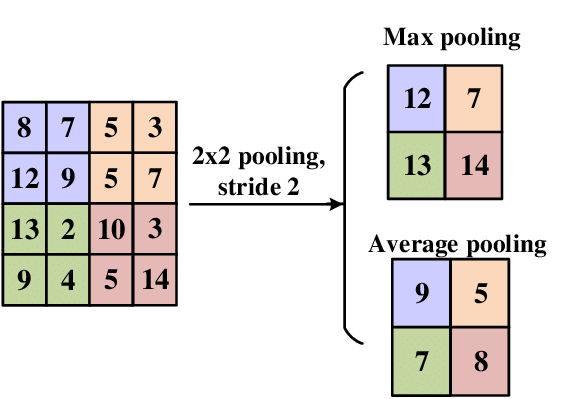

4. **Fully Connected (Dense) Layer**: These layers are similar to those in traditional neural networks and are used for the final classification. The output from the convolutional and pooling layers is flattened and fed into the fully connected layer. 
    - Flatten is used to convert pooled feature maps to a single column that is passed to the fully connected layer

### **Training a CNN**

1. **Forward Propagation**: Input data is passed through the network to obtain an output.
2. **Loss Calculation**: A loss function (e.g., cross-entropy loss) measures the difference between the predicted output and the actual labels.
3. **Backpropagation**: The gradients of the loss with respect to each parameter are computed, and the weights are updated using optimization algorithms like stochastic gradient descent (SGD) or Adam.

### How does CNN works?

- In this example we are going to use grayscale image for simplicity

**Step 1: Input Layer**

- Below is our grayscale image with having 5x5 shape:

| 1 | 1 | 1 | 0 | 0 |
| --- | --- | --- | --- | --- |
| 0 | 1 | 1 | 1 | 0 |
| 0 | 0 | 1 | 1 | 1 |
| 0 | 0 | 1 | 1 | 0 |
| 0 | 1 | 1 | 0 | 0 |

**Step 2: Convolutional Layer**

- We are going to apply the filter/kernel of 3x3 matrix:

| 1 | 0 | 1 |
| --- | --- | --- |
| 0 | 1 | 0 |
| 1 | 0 | 1 |
- filter: fxf → 3x3
- padding: p = 0 (valid)
- stride: s = 1
- Each filter is convolved with the input image by performing element-wise multiplication and summing up the results

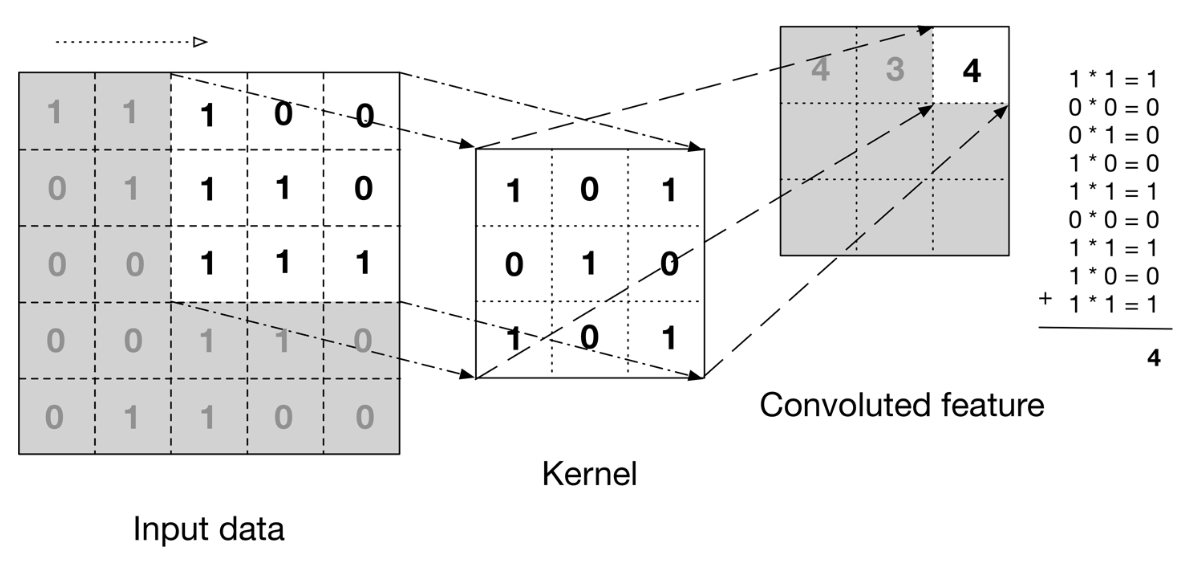

- Here you can see how feature maps are produced:

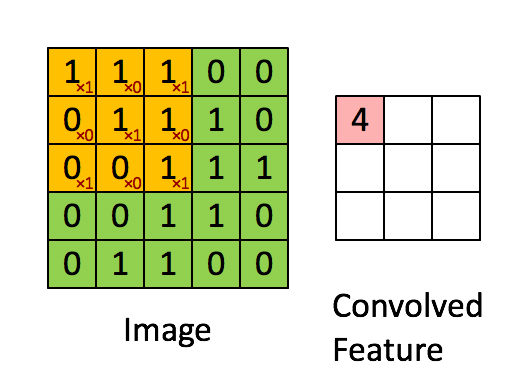

- The feature map that we got is a 3x3 and it can be proved as:

$$
\text{as padding is valid so we compute using below formula:}\\ valid = [\frac{n-f}{s}+1] \times [\frac{n-f}{s}+1] \\ n\times n:5\times5, f\times f:3\times3, s=1\\  \text{feature map size} =[\frac{5-3}{1}+1] \times [\frac{5-3}{1}+1]\\ \text{feature map size} = 3\times3
$$

- As our input channel is one, we just ignore it
- And here is feature maps that we got after apply Conv:

| 4 | 3 | 4 |
| --- | --- | --- |
| 2 | 4 | 3 |
| 2 | 3 | 4 |

**Step 3: Activation Function**

- After each convolutional layer, an activation function is applied to introduce non-linearity into the model. The most commonly used activation function is ReLU (Rectified Linear Unit), defined as: ReLU(x) = max(0, x)

`Note`:ReLU helps in accelerating the convergence of the training process by reducing the likelihood of vanishing gradients.

- We apply the ReLU function element-wise to the matrix. Here's how it's done:

$$

Element (0,0): ReLU(4)=max⁡(0,4)=4\\
Element (0,1): ReLU(3)=max⁡(0,3)=3\\
Element (0,2): ReLU(4)=max⁡(0,4)=4\\
Element (1,0): ReLU(2)=max⁡(0,2)=2\\
Element (1,1): ReLU(4)=max⁡(0,4)=4\\
Element (1,2): ReLU(3)=max⁡(0,3)=3\\
Element (2,0): ReLU(2)=max⁡(0,2)=2\\
Element (2,1): ReLU(3)=max⁡(0,3)=3\\
Element (2,2): ReLU(4)=max⁡(0,4)=4\\

$$

- After applying the ReLU activation function to each element, the result we got is:

| 4 | 3 | 4 |
| --- | --- | --- |
| 2 | 4 | 3 |
| 2 | 3 | 4 |

**Step4: Pooling Layer**

- Pooling layers are used to reduce the spatial dimensions (width and height) of the feature maps, which helps in reducing the computational cost and controlling overfitting
- For this example we are going to use 2x2 average pooling with stride 1

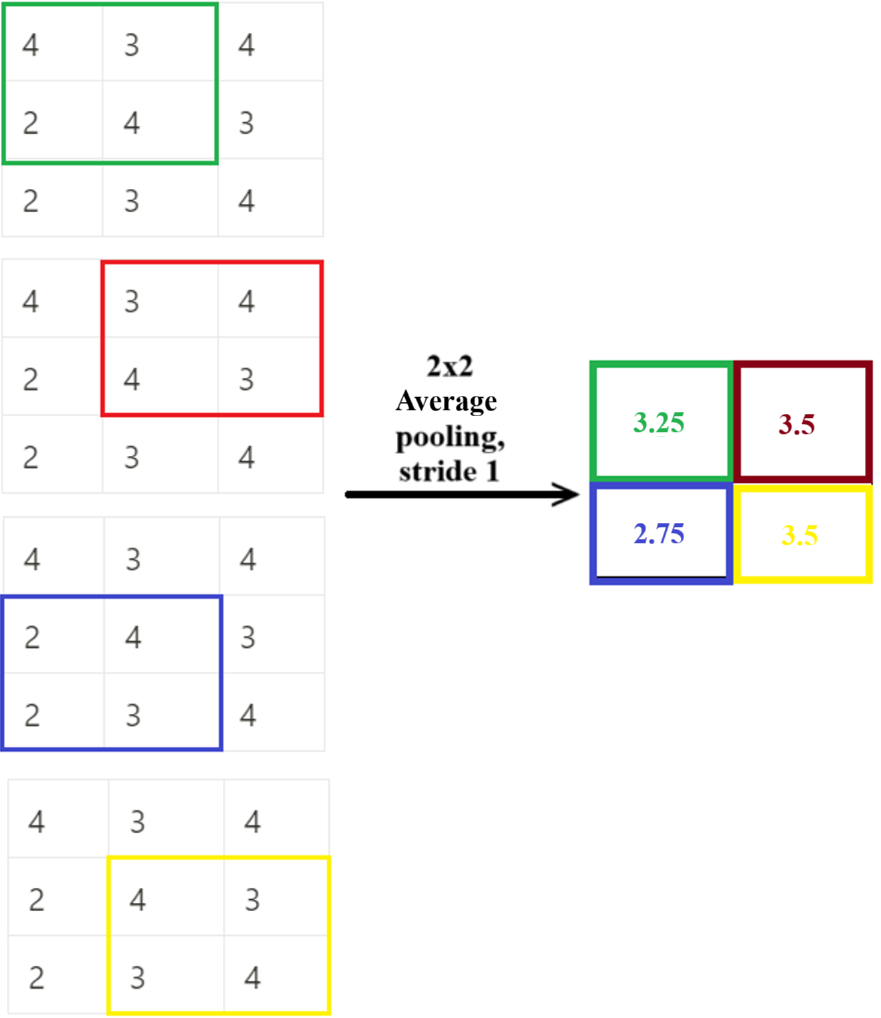

**Step 5: Fully Connected Layer**

- After several convolutional and pooling layers, the high-level reasoning in the neural network is done via fully connected layers. These layers take the flattened output from the convolutional layers and produce the final output
- **Flattening**: Converts the 2D matrix of features into a 1D vector
- **Dense Layer**: A fully connected layer where each neuron is connected to every neuron in the previous layer
- The flattened vector serves as the input to the fully connected layer

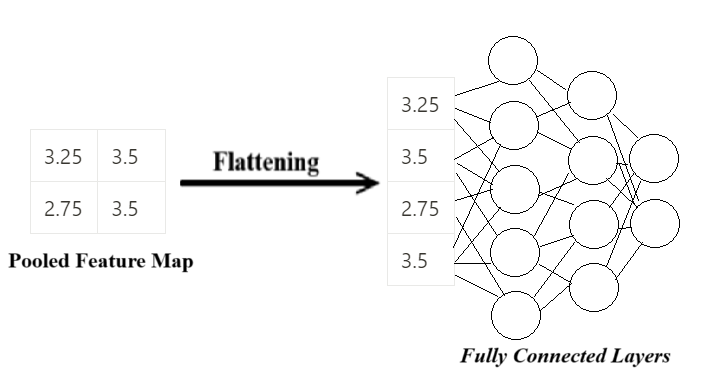

**Step 6: Output Layer**

- The final layer is typically a fully connected layer with a softmax activation function for multi class classification tasks. The softmax function converts the outputs (logits) into probabilities for each class

$$
Softmax(z_i) = \frac{e^{z_i}}{\sum_j^k e^{z_j}}
$$

- k: number of classes in the multi-class classifier

### RGP image:

- In this image the input size is 4x4x3 (**Height, Width, Num Of Channels**) while in grayscale images we have nxnx1 where channels is one

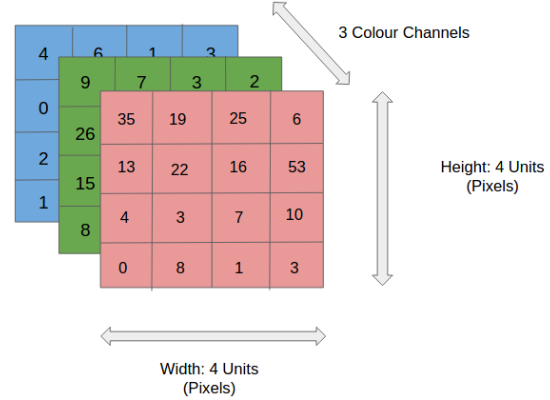

- Below is the process of shown how CNN works on RGP images:

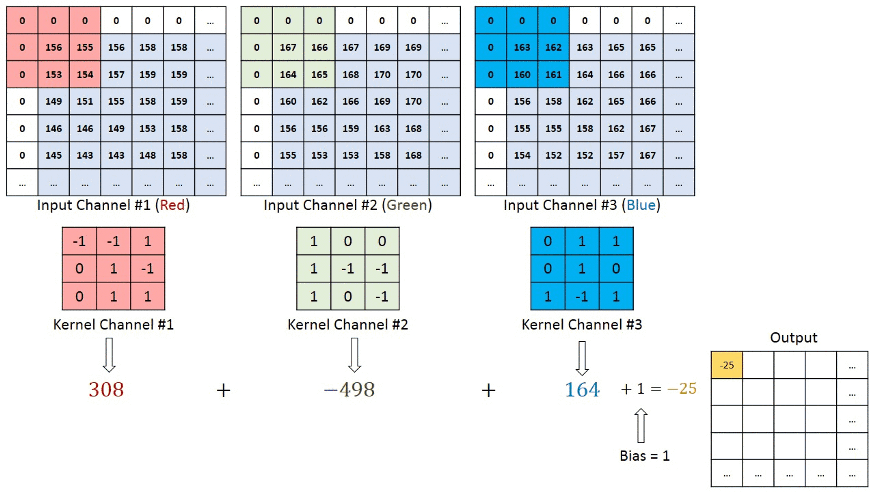

- We got an input image of (5x5x3)
- Padding is 1
- Stride is 1
- We apply one filter of 3x3x3
- Our output feature map size is 5x5x1, remember if the input feature map has 3 channels (e.g., an RGB image), and the convolutional layer uses 1 filter, then the output feature map will have 1 channel. And that is the reason we got one channel for the output feature maps
- Then, we apply activation function (ReLU)
- Next layer is pooling layer, remember that a pooling layer does not change the number of channels. It only reduces the spatial dimensions (height and width) of each channel
- Finally, we apply flatten layer to converts 2D matrix of features into a 1D vector, and flatten vector goes through a fully connected layer to classify the images

 **More Details:**

1. Input images is 5x5x3
2. I want to apply two filters of 3x3x3, after applying RuLU, the output feature maps is 4x4x2, we see as we have two filters then the output feature maps channels is two
3. Then if we apply pooling 2x2 with stride 2 on 4x4x2, our pooled feature maps will be 2x2x2
4. Finnally, we apply flatten, the size after applying flatten is 8

### **Popular CNN Architectures**

- **LeNet-5**: One of the earliest CNN architectures by Yann LeCun for digit recognition
- **AlexNet**: Won the ImageNet competition in 2012, significantly deeper and wider than LeNet-5
- **VGGNet**: Known for its simplicity and use of very small (3x3) convolution filters
- **GoogLeNet (Inception)**: Introduced the inception module to make the network wider rather than deeper
- **ResNet**: Introduced residual blocks to solve the vanishing gradient problem, allowing very deep networks

[***More About CNN Architectures In Depth***](https://medium.com/@fraidoonomarzai99/common-cnn-architectures-73d47275bbaf)

### **Advantages of CNNs**

- **Parameter Sharing**: Reduces the number of parameters, making the network less prone to overfitting
- **Local Connectivity**: Captures local dependencies which are crucial for tasks like image processing
- **Automatic Feature Extraction**: Learns features directly from data, eliminating the need for manual feature extraction

### **Challenges and Limitations**

- **Computational Cost**: Training deep CNNs requires significant computational power and time
- **Data Requirement**: Requires a large amount of labeled data for effective training
- **Interpretability**: It can be challenging to interpret and understand the features learned by CNNs